In [8]:
# 读取csv
import csv
data = []
with open('../Calibration/data/squ2011_88.csv','rt') as f:
    csv_reader = csv.reader(f)
    isHeader = True                 # 判断帧头
    for row in csv_reader:          # 将csv 文件中的数据保存到data中
        if isHeader:
            isHeader = False
            continue
        frame = {
            'time':row[0],
            'xyd':row[1:4],
            'press':row[4],
            'mag4':row[5:17]
            }
        data.append(frame)           # 将字典加入到data数组中


[[ -2.4   -4.5  341.22 ... 108.   111.9  380.91]
 [ -1.2   -3.3  338.8  ... 110.4  111.3  380.91]
 [ -2.7   -3.6  342.67 ... 110.7  111.3  379.94]
 ...
 [  7.5   -5.1  343.64 ... 114.9  107.4  373.16]
 [ 10.2   -6.9  342.67 ... 119.4  105.3  377.52]
 [  6.9   -5.4  340.25 ... 119.1  106.2  375.58]]
[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 ...
 [20. 20.]
 [20. 20.]
 [20. 20.]]


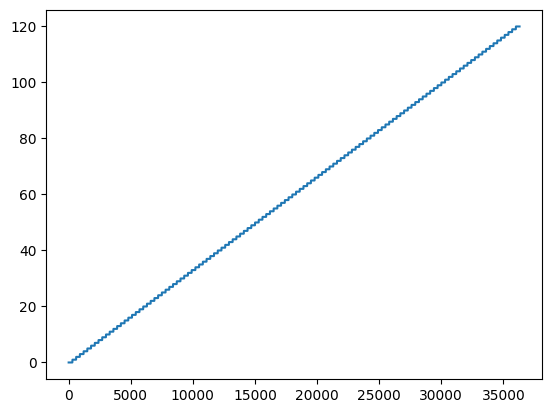

In [35]:
import numpy as np

length = len(data)
# 数据预处理
mag = np.zeros((length,12))
xy = np.zeros((length,2))
for i,frame in enumerate(data):
    mag[i] = frame['mag4']
    xy[i] = frame['xyd'][:2]
xy4 = np.zeros(length)

# 将触点位置标签化
for i,frame in enumerate(data):
    xy4[i]=int(xy[i][0]/2)*11+int(xy[i][1]/2)

import matplotlib.pyplot as plt
plt.plot(xy4)
plt.show()

In [28]:
# import tensorflow as tf
# from tensorflow import keras
# from keras.models import Sequential
# from keras.layers.core import Dense

# model = Sequential()
# model.add(Dense(200, input_dim=12))
# model.add(Dense(400))
# model.add(Dense(400, activation='relu'))
# model.add(Dense(200, activation='relu'))
# model.add(Dense(2, activation='relu'))
# model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])
# model.summary()

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 数据集划分
x_train, x_test, y_train, y_test = train_test_split(mag, xy4, test_size = 0.20, random_state = 42)

# 随机森林
model = RandomForestClassifier(random_state=0,max_depth = 10)
model.fit(x_train, y_train)
score_a = model.score(x_train,y_train)
print(score_a)

# 随机森林验证
score_t = model.score(x_test,y_test)
print(score_t)

[ 92.  30. 107. ...  37.   2.  52.]
0.8800619834710743
0.8170798898071625


[ 57.  90.  62. ...  47.  64. 113.]


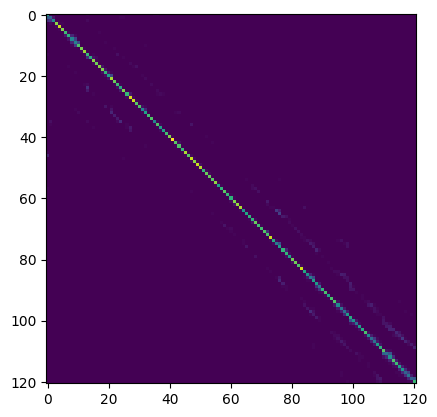

In [37]:
from sklearn.metrics import confusion_matrix
# 得到预测结果
y_yest_p = model.predict(x_test)
# 计算混淆矩阵
C=confusion_matrix(y_test, y_yest_p)
# 绘制混淆矩阵
fig, ax = plt.subplots()
im = ax.imshow(C)
plt.show()